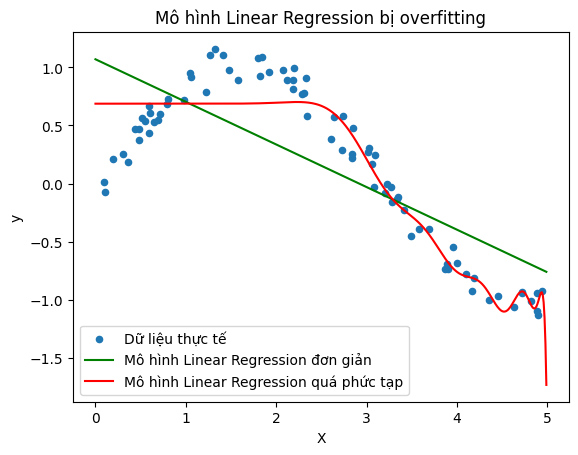

MSE (đơn giản): 0.18821603485956231
MSE (quá phức tạp): 0.05069422473147198


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Tạo dữ liệu giả định
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Sắp xếp lại dữ liệu
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Tạo mô hình Linear Regression đơn giản
model_simple = LinearRegression()
model_simple.fit(X, y)
y_pred_simple = model_simple.predict(X_test)

# Tạo mô hình Linear Regression quá phức tạp (sử dụng đa thức bậc cao)
poly_features = PolynomialFeatures(degree=30)
X_poly = poly_features.fit_transform(X)
model_complex = LinearRegression()
model_complex.fit(X_poly, y)
X_test_poly = poly_features.transform(X_test)
y_pred_complex = model_complex.predict(X_test_poly)

# Vẽ biểu đồ dữ liệu và dự đoán của cả hai mô hình
plt.scatter(X, y, s=20, label='Dữ liệu thực tế')
plt.plot(X_test, y_pred_simple, label='Mô hình Linear Regression đơn giản', color='g')
plt.plot(X_test, y_pred_complex, label='Mô hình Linear Regression quá phức tạp', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Mô hình Linear Regression bị overfitting')
plt.show()

# Đo độ tốt của mô hình bằng Mean Squared Error
mse_simple = mean_squared_error(y, model_simple.predict(X))
mse_complex = mean_squared_error(y, model_complex.predict(X_poly))

print("MSE (đơn giản):", mse_simple)
print("MSE (quá phức tạp):", mse_complex)


c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+00, tolerance: 3.764e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+00, tolerance: 3.764e-03
  model = cd_fast.enet_coordinate_descent(


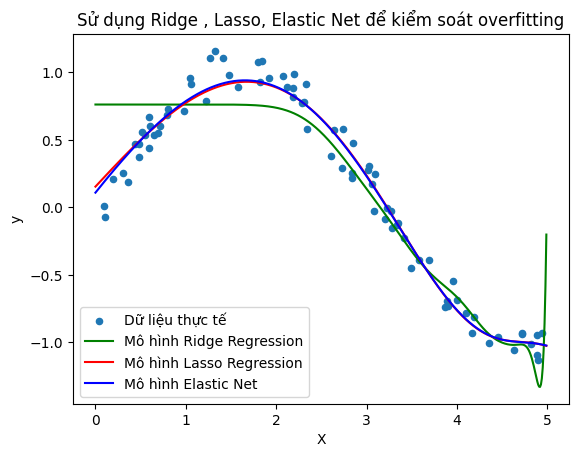

MSE (Ridge): 0.05786060072470971
MSE (Lasso): 0.012555290620495244
MSE (Elastic Net): 0.011542538359521959


In [9]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet

# Sử dụng Ridge Regression để kiểm soát overfitting
ridge_model = Ridge(alpha=0.01)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
ridge_model.fit(X_poly, y)
y_pred_ridge = ridge_model.predict(X_test_poly)

# Sử dụng Lasso Regression để kiểm soát overfitting
lasso_model = Lasso(alpha=0.01)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
lasso_model.fit(X_poly, y)
y_pred_lasso = lasso_model.predict(X_test_poly)

# Sử dụng Elastic Net để kiểm soát overfitting
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Thay đổi giá trị alpha và l1_ratio để điều chỉnh mức độ regularization
elastic_net_model.fit(X_poly, y)
y_pred_elastic_net = elastic_net_model.predict(X_test_poly)
# Vẽ biểu đồ dữ liệu và dự đoán của cả hai mô hình
plt.scatter(X, y, s=20, label='Dữ liệu thực tế')
plt.plot(X_test, y_pred_ridge, label='Mô hình Ridge Regression', color='g')
plt.plot(X_test, y_pred_lasso, label='Mô hình Lasso Regression', color='r')
plt.plot(X_test,y_pred_elastic_net, label ='Mô hình Elastic Net' ,color = 'b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Sử dụng Ridge , Lasso, Elastic Net để kiểm soát overfitting')
plt.show()

# Đo độ tốt của mô hình bằng Mean Squared Error
mse_ridge = mean_squared_error(y, ridge_model.predict(X_poly))
mse_lasso = mean_squared_error(y, lasso_model.predict(X_poly))
mse_elastic_net = mean_squared_error(y, elastic_net_model.predict(X_poly))


print("MSE (Ridge):", mse_ridge)
print("MSE (Lasso):", mse_lasso)
print("MSE (Elastic Net):", mse_elastic_net)

In [10]:

np.round(model_complex.coef_, 2)

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0.,  0., -0.])

In [11]:
np.round(ridge_model.coef_, 2)

array([-0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0.])

In [12]:
np.round(lasso_model.coef_, 2)

array([ 0.  ,  0.72, -0.02, -0.08, -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ])

c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+00, tolerance: 3.764e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+00, tolerance: 3.764e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Best Alpha Ridge: 0.3
Best MSE Ridge: 0.05785928609734011
Best Alpha Lasso: 0.01
Best MSE Lasso: 0.012555290620495244
Best Alpha Elastic Net: 0.01
Best MSE Elastic Net: 0.011542538359521959


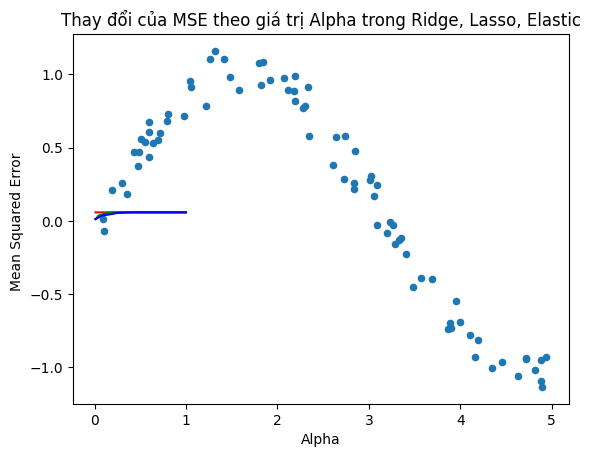

In [18]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet
# Tạo một dãy giá trị alpha từ 0.01 đến 1 với khoảng cách đều
alphas = np.linspace(0.01, 1, 100)

# Tạo một dictionary để lưu trữ các mô hình và kết quả MSE tương ứng
Ridge_models = {}
Lasso_models = {}
Elastic_net_models = {}

mse_values_ridge = []
mse_values_lasso = []
mse_values_elastic_net = []

for alpha in alphas:
    # Sử dụng Ridge Regression để kiểm soát overfitting
    ridge_model = Ridge(alpha = alpha)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
    ridge_model.fit(X_poly, y)
    y_pred_ridge = ridge_model.predict(X_test_poly)
    Ridge_models[alpha] = ridge_model
    # Đo độ tốt của mô hình bằng Mean Squared Error và lưu kết quả
    mse_ridge = mean_squared_error(y, ridge_model.predict(X_poly))
    mse_values_ridge.append(mse_ridge)


    # Sử dụng Lasso Regression để kiểm soát overfitting
    lasso_model = Lasso(alpha = alpha)  # Thay đổi giá trị alpha để điều chỉnh mức độ regularization
    lasso_model.fit(X_poly, y)
    y_pred_lasso = lasso_model.predict(X_test_poly)
    Lasso_models[alpha] = lasso_model
    # Đo độ tốt của mô hình bằng Mean Squared Error và lưu kết quả
    mse_lasso = mean_squared_error(y, lasso_model.predict(X_poly))
    mse_values_lasso.append(mse_lasso)

    
    # Sử dụng Elastic Net để kiểm soát overfitting
    elastic_net_model = ElasticNet(alpha = alpha, l1_ratio=0.5)  # Thay đổi giá trị alpha và l1_ratio để điều chỉnh mức độ regularization
    elastic_net_model.fit(X_poly, y)
    y_pred_elastic_net = elastic_net_model.predict(X_test_poly)
    Elastic_net_models[alpha] = elastic_net_model
    # Đo độ tốt của mô hình bằng Mean Squared Error và lưu kết quả
    mse_elastic_net = mean_squared_error(y, elastic_net_model.predict(X_poly))
    mse_values_elastic_net.append(mse_elastic_net)


# Chọn giá trị alpha tốt nhất
best_alpha_ridge = alphas[np.argmin(mse_values_ridge)]
best_ridge_model = Ridge_models[best_alpha_ridge]
# In ra giá trị alpha tốt nhất và MSE tương ứng
print("Best Alpha Ridge:", best_alpha_ridge)
print("Best MSE Ridge:", min(mse_values_ridge))
print("=======================================================================")
# Chọn giá trị alpha tốt nhất
best_alpha_Lasso = alphas[np.argmin(mse_values_lasso)]
best_lasso_model = Lasso_models[best_alpha_Lasso]
# In ra giá trị alpha tốt nhất và MSE tương ứng
print("Best Alpha Lasso:", best_alpha_Lasso)
print("Best MSE Lasso:", min(mse_values_lasso))
print("=======================================================================")

# Chọn giá trị alpha tốt nhất
best_alpha_elastic_net = alphas[np.argmin(mse_values_elastic_net)]
best_elastic_net_model = Elastic_net_models[best_alpha_elastic_net]

# In ra giá trị alpha tốt nhất và MSE tương ứng
print("Best Alpha Elastic Net:", best_alpha_elastic_net)
print("Best MSE Elastic Net:", min(mse_values_elastic_net))



#  Vẽ biểu đồ thay đổi của MSE theo giá trị alpha
plt.scatter(X, y, s=20, label='Dữ liệu thực tế')
plt.plot(alphas, mse_values_ridge, color='r')
plt.plot(alphas, mse_values_lasso, color='g')
plt.plot(alphas, mse_values_elastic_net, color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error ')
plt.title('Thay đổi của MSE theo giá trị Alpha trong Ridge, Lasso, Elastic')
plt.show()